In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [7]:
population_size = 28

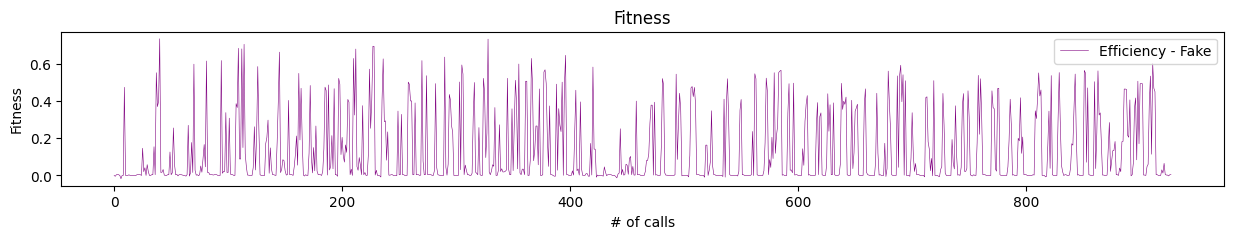

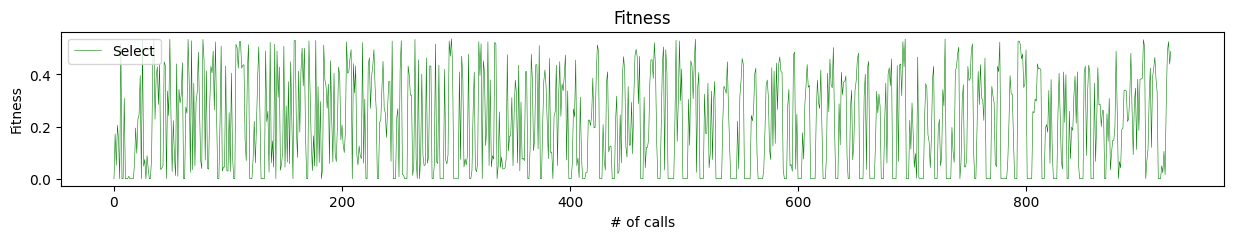

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('CMS-SpikingNeuralNetwork/Code/values_ga_10k.csv')


# Plot fitness values
plt.figure(figsize=(15, 2))
plt.plot(df['fitnessEff']-df['fitnessFake'], color = 'purple', linewidth=0.4, label='Efficiency - Fake')
plt.legend()
plt.title('Fitness')
plt.xlabel('# of calls')
plt.ylabel('Fitness')
plt.show()

# plt.figure(figsize=(15, 2))
# plt.plot(df['fitnessFake'], 'b-', linewidth=0.6, label='Fake')
# plt.legend()
# plt.title('Fitness')
# plt.xlabel('# of calls')
# plt.ylabel('Fitness')
# plt.show()

plt.figure(figsize=(15, 2))
plt.plot(df['fitnessSel'], 'g-', linewidth=0.4, label='Select')
plt.legend()
plt.title('Fitness')
plt.xlabel('# of calls')
plt.ylabel('Fitness')
plt.show()


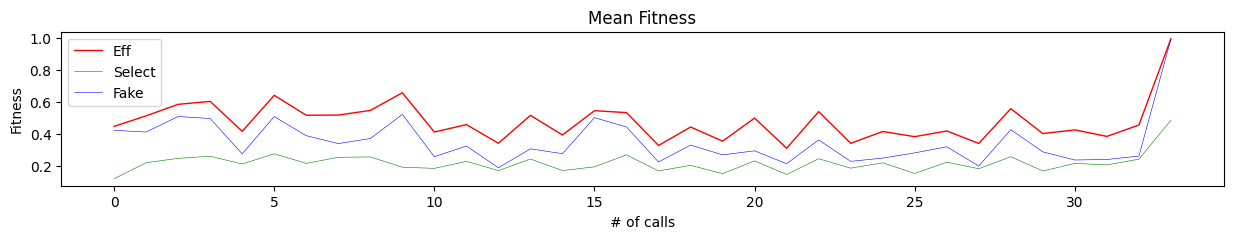

In [9]:
# Initialize lists to save the best fitness values and parameters
best_params = []
best_generat = []
best_sel = []
best_fake = []

pop_fit = []
pop_fit_sel = []
pop_fit_fake = []

# Define population size (ensure this is set correctly according to your data)
population_size = 28  # Example value, set this to the correct population size

#compute the mean fitness of the population
for i in range(0, len(df), population_size):
    pop = df[i:i+population_size]
    pop_fit.append(pop['fitnessEff'].mean())
    pop_fit_sel.append(pop['fitnessSel'].mean())
    pop_fit_fake.append(pop['fitnessFake'].mean())

# Plot the mean fitness of the population
plt.figure(figsize=(15, 2))
plt.plot(pop_fit, 'r-', linewidth=1, label='Eff')
plt.plot(pop_fit_sel, 'g-', linewidth=0.4, label='Select')
plt.plot(pop_fit_fake, 'b-', linewidth=0.4, label='Fake')
plt.legend()
plt.title('Mean Fitness')
plt.xlabel('# of calls')
plt.ylabel('Fitness')
plt.show()